**Classifying Muffins and Cupcakes with SVM**

In [2]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

**import data**

In [4]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


```Seaborn's lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful for comparing numeric variables.
If there are multiple instances of each variable along x, you can provide a reduction function to x_estimator to visualize a summary statistic such as the mean.```

_hue_
`` hue is used for to differentiate the catagory``

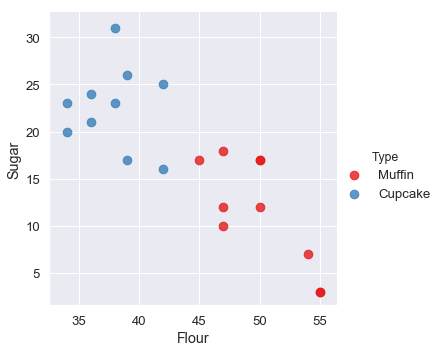

In [5]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 75});

**Features**
_inputs for the model_

In [6]:
# Specify inputs for the model
ingredients = recipes[['Flour','Sugar']].values
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [7]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

1. Here, creating hyperplane using coefficients and intercept methods and also generating equal space intervals by using linspace between 30,60.
2. And also created support verctors to visulaize the data between muffin and cake as(yy_down, yy_up).


In [29]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
print(xx)
yy = a * xx - (model.intercept_[0]) / w[1]
print(yy)
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

[30.         30.6122449  31.2244898  31.83673469 32.44897959 33.06122449
 33.67346939 34.28571429 34.89795918 35.51020408 36.12244898 36.73469388
 37.34693878 37.95918367 38.57142857 39.18367347 39.79591837 40.40816327
 41.02040816 41.63265306 42.24489796 42.85714286 43.46938776 44.08163265
 44.69387755 45.30612245 45.91836735 46.53061224 47.14285714 47.75510204
 48.36734694 48.97959184 49.59183673 50.20408163 50.81632653 51.42857143
 52.04081633 52.65306122 53.26530612 53.87755102 54.48979592 55.10204082
 55.71428571 56.32653061 56.93877551 57.55102041 58.16326531 58.7755102
 59.3877551  60.        ]
[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 

**lets create support vectors**

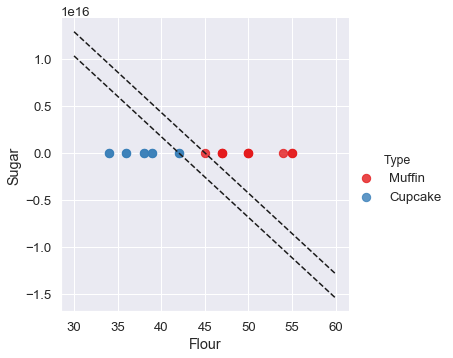

In [30]:
# Look at support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

**hyper plane using w(vector) and x values using lispace(equal space interval between every point) -> W.x+b>=0**

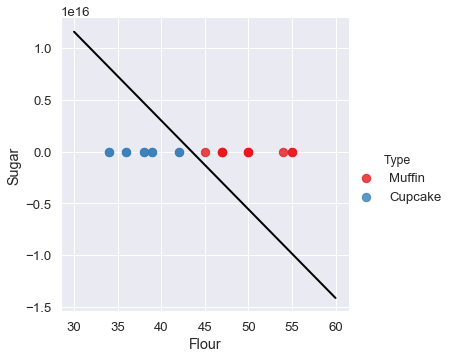

In [31]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

**create a mid point hyper plane using support vectors (maximum width)**

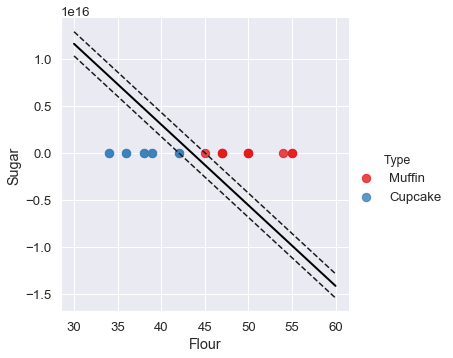

In [32]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [33]:
# Create a function to guess whether a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [34]:
muffin_or_cupcake(17,20)

You're looking at a cupcake recipe!
